In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

In [3]:
num_words, num_training, num_testing, train_data, test_data, train_labels, test_labels = load_all_data()

Shelved file does not exist yet. Loading data from raw text files.
Finished loading in 75.20 seconds.


In [4]:
d = 5000 # maximum number of features

In [5]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print gain

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
test_data = test_data[ranks[:d], :]

[  6.89207784e-03   5.72929454e-03   2.35420535e-02 ...,  -2.22044605e-16
  -2.22044605e-16  -2.22044605e-16]


In [6]:
# randomly shuffle data

order = range(num_training)
random.shuffle(order)

train_data = train_data[:, order]
train_labels = train_labels[order]

In [7]:
# Try naive Bayes with cross-validation

alpha_values = 10.0 ** np.array(range(-10,0))

cv_score = np.zeros(alpha_values.size)

params = dict()

for i in range(alpha_values.size):
    params['alpha'] = alpha_values[i]
    cv_score[i], _ = cross_validate(naive_bayes_train, naive_bayes_predict, 
                                    train_data, train_labels, 8, params)

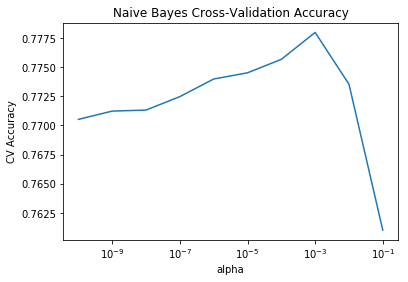

In [8]:
plt.semilogx(alpha_values, cv_score)
plt.xlabel('alpha')
plt.ylabel('CV Accuracy')
plt.title('Naive Bayes Cross-Validation Accuracy')

In [9]:
# Train on full data with best alpha value

best_alpha_index = cv_score.argmax()

params['alpha'] = alpha_values[best_alpha_index]

nb_model = naive_bayes_train(train_data, train_labels, params)

In [10]:
# Compute testing accuracy

nb_predictions = naive_bayes_predict(test_data, nb_model)

nb_accuracy = np.mean(nb_predictions == test_labels)

print("Naive Bayes testing accuracy: %f" % nb_accuracy)

Naive Bayes testing accuracy: 0.670886


In [12]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 250

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

In [13]:
depth_values = np.array([2, 4, 8, 16, 32, 64])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

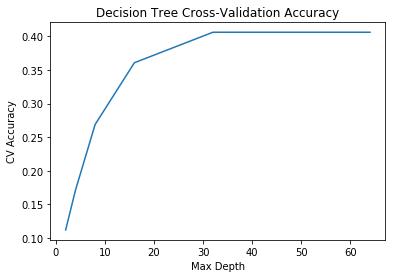

In [14]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [15]:
# Train on full data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

In [16]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)

print("Decision tree testing accuracy: %f" % dt_accuracy)

Decision tree testing accuracy: 0.386542
